In [12]:
import re
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from itertools import cycle
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

In [2]:
def elbow_method(X):
    distortions = []
    K = range(1,10)
    for n_clusters in K: 
        kmeans_model = KMeans(n_clusters=n_clusters)
        kmeans = kmeans_model.fit(X)
        distortions.append(kmeans_model.inertia_)

    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [3]:
def plot_figure_pca(X):
    pca = PCA(n_components=2)
    new_X = pca.fit_transform(X)

    k_means_cluster_centres = kmeans.cluster_centers_
    new_cluster_centres = pca.transform(k_means_cluster_centres)
    
    fig = plt.figure(1)
    plt.figure(figsize=(15,10))
    k_means_labels = kmeans.labels_
    colors =  cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters), colors):
        my_members = k_means_labels == k
        cluster_center = new_cluster_centres[k]
        plt.plot(new_X[my_members, 0], new_X[my_members, 1], col+'.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=10)

    plt.title('PCA - Number of clusters: %d' % n_clusters)
    plt.show()

In [7]:
def read_file_ribo(file_name, one_type_reads, all_reada, one_type_modifs, all_modifs):
    f = open(file_name, 'r', encoding='utf8')
    line = f.readline().strip()
    while line != '':
        parts = re.split('\s+', line)
        one_type_reads.append(parts[0])
        all_reads.append(parts[0])
        modif = parts[1:]
        one_type_modifs.append(list(int(i) for i in modif))
        all_modifs.append(list(int(i) for i in modif))
        line = f.readline().strip()
    f.close()

In [15]:
def read_simulated(file_name, all_reads, all_modifs):
    f = open(file_name, 'r', encoding='utf-8')
    line = f.readline().strip()
    while line != '':
        parts = re.split('\t', line)
        modif = parts[1].split(" ")
        all_reads.append((modif, parts[0]))
        all_modifs.append(list(int(i) for i in modif))
        line = f.readline().strip()
    f.close()

In [26]:
def save_clusters_to_file_ribo(file_name, all_reads, labels):
    f = open(file_name, "w")
    for i in range(len(all_reads)):
        f.write(all_reads[i] + ' : ' + str(labels[i]) + '\n')
    f.close()

In [27]:
def save_clusters_to_file_simulated(file_name, all_reads, labels):
    f = open(file_name, "w")
    for i in range(len(all_reads)):
        f.write(all_reads[i][1] + ' : ' + str(labels[i]) + '\n')
    f.close()

# RIBOSWITCH DATA 

In [9]:
ligand_reads = []
noligand_reads = []
all_reads = []
ligand_modifs = []
noligand_modifs = []
all_modifs = []

read_file_ribo('TPP_TenA_ligand.tsv', ligand_reads, all_reads, ligand_modifs, all_modifs)
read_file_ribo('TPP_TenA_noligand.tsv', noligand_reads, all_reads, noligand_modifs, all_modifs)

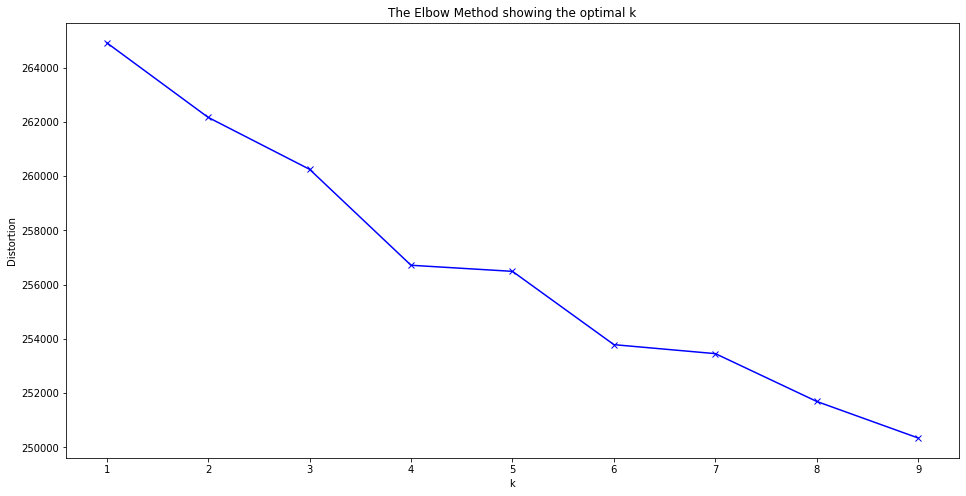

In [10]:
elbow_method(all_modifs)

<Figure size 432x288 with 0 Axes>

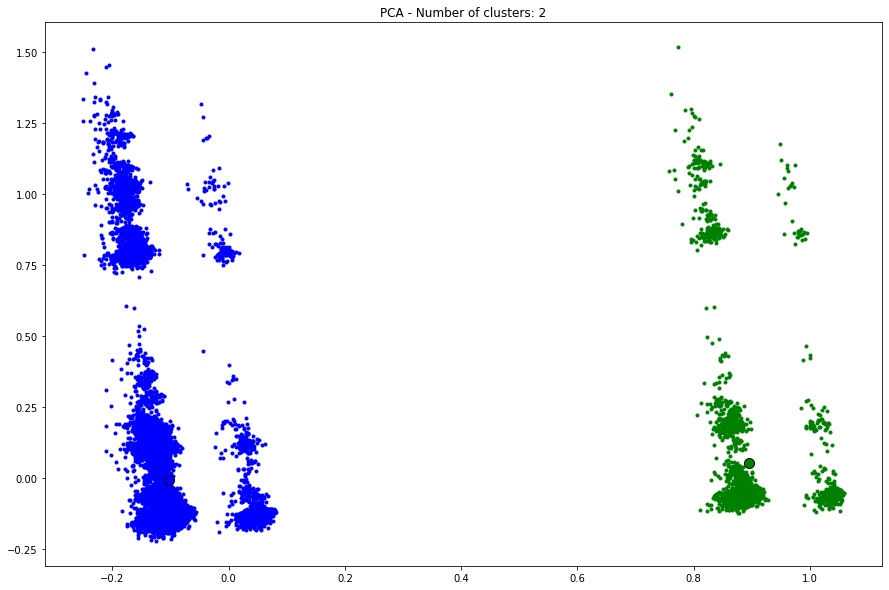

In [13]:
n_clusters = 2
kmeans_model = KMeans(n_clusters=n_clusters)
kmeans = kmeans_model.fit(all_modifs)

plot_figure_pca(all_modifs)

In [17]:
save_clusters_to_file_ribo("TPP_kmeans_clusters.txt", all_reads, kmeans.labels_)

# SIMULATED DATA

In [19]:
all_reads = []
all_modifs = []

read_simulated("ribo_simulated_data.txt", all_reads, all_modifs)


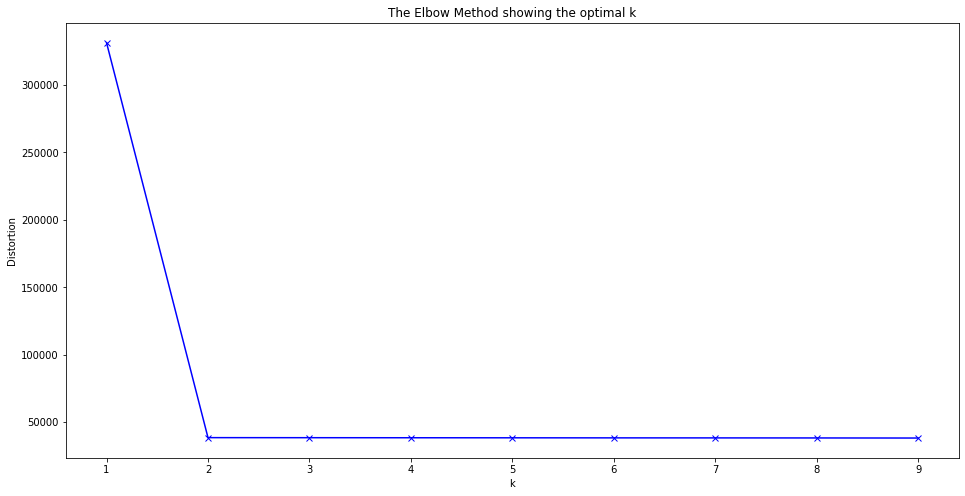

In [20]:
elbow_method(all_modifs)

<Figure size 432x288 with 0 Axes>

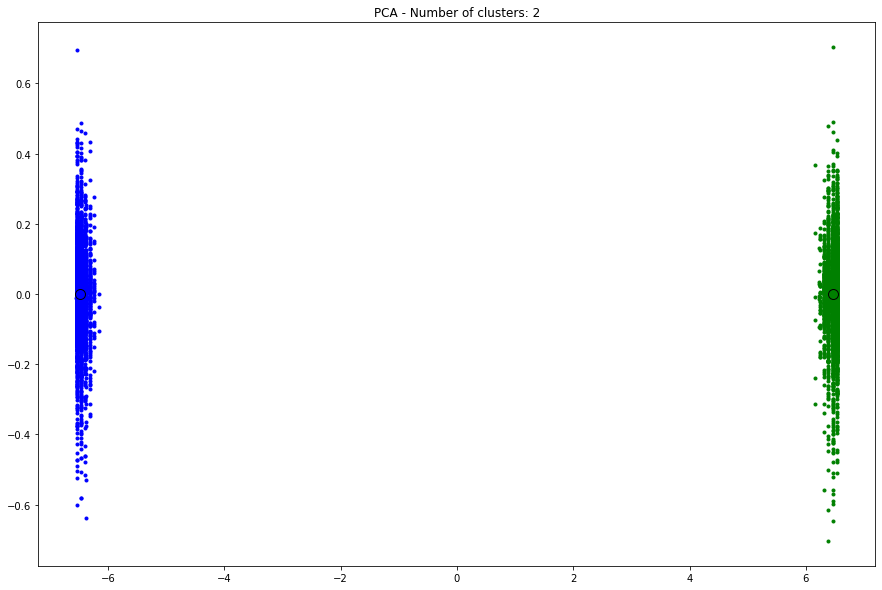

In [21]:
n_clusters = 2
kmeans_model = KMeans(n_clusters=n_clusters)
kmeans = kmeans_model.fit(all_modifs)

plot_figure_pca(all_modifs)

In [28]:
save_clusters_to_file_simulated("simulated_ribo_kmeans_clusters.txt", all_reads, kmeans.labels_)